In [181]:
# Import necessary libraries
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [183]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [184]:
df = pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [185]:
df['status'] = df['status'].apply(lambda x: 'Recovered' if x==1 else 'Died')

In [186]:
df_tit = pd.read_csv(r'D:\Titanic_dataset\train.csv')
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
df_tit['Survived'] = df_tit['Survived'].apply(lambda x: 'Survived' if x==1 else 'Died')

<font size = '6'>Histogram plotting</font>

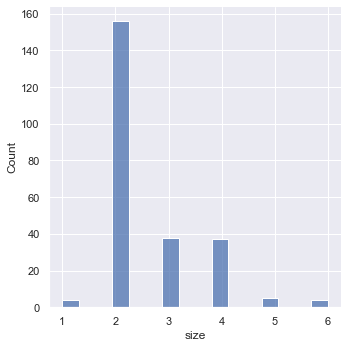

In [86]:
# Default bins using some math approach
# kind = 'hist' is default i.e histogram

# displot() versions
# histplot() (with kind="hist"; the default)

# kdeplot() (with kind="kde")

# ecdfplot() (with kind="ecdf"; univariate-only)

# Univariate histogram
sns.displot(tips, x="size",kind ='hist')

Count : [  4 156  38  37   5   4]
Bins : [1.         1.83333333 2.66666667 3.5        4.33333333 5.16666667
 6.        ]


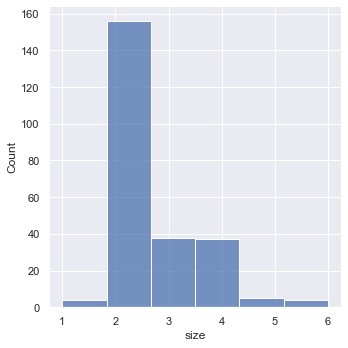

In [87]:
# Specify you own bins or discrete = True
# to get rid of spaces between bars

sns.displot(tips, x="size",kind ='hist',bins = 6)

# if you want to get the hists(count) of each bin in bins
hists,bins = np.histogram(tips['size'],bins = 6)
print("Count :",hists)
print("Bins :",bins)

# or
# sns.displot(tips, x="size",kind ='hist', discrete = True)

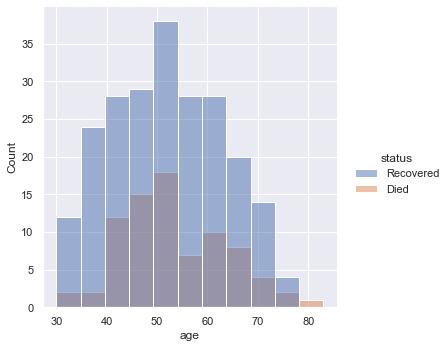

In [88]:
# Differentiate histogram between different classes
sns.displot(df, x="age",kind ='hist',hue = 'status')

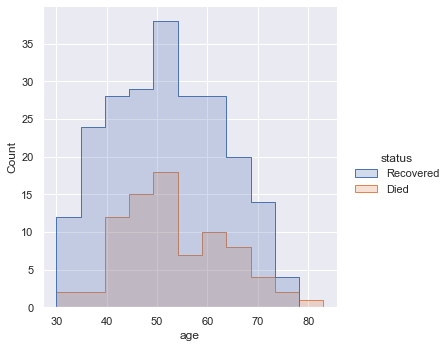

In [89]:
# You can specify your own way of visulaizing histogram with
# either bars, polygon or steps(default element = 'bars')
sns.displot(df, x="age",kind ='hist',hue = 'status', element = 'step')

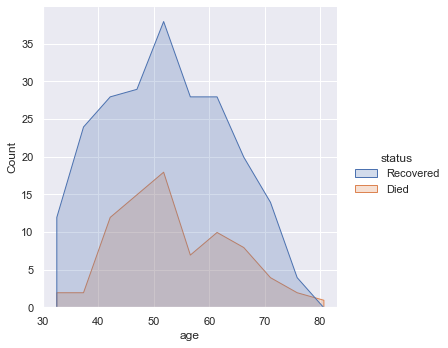

In [90]:
sns.displot(df, x="age",kind ='hist',hue = 'status', element = 'poly')

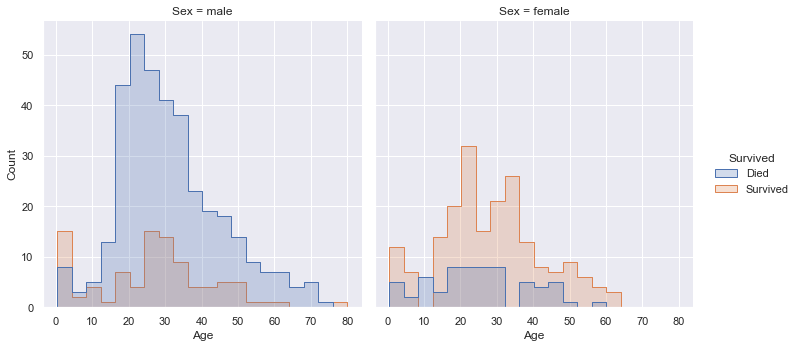

In [91]:
# it is also possible to draw each individual distribution in a separate 
# subplot by assigning the second variable to col or row rather than (or in addition to) hue
sns.displot(df_tit,x = 'Age',col = 'Sex',hue='Survived',element = 'step')

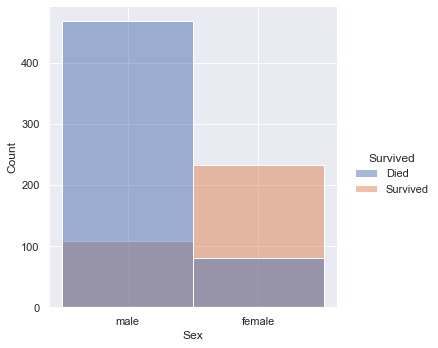

In [92]:
# You can also plot categorical columns
sns.displot(df_tit,x = 'Sex',hue='Survived',element = 'bars')

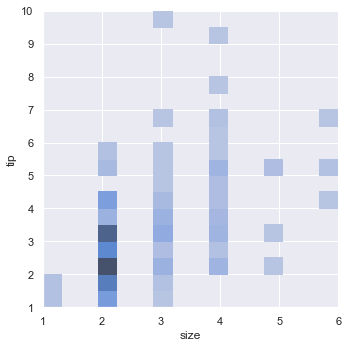

In [93]:
# Bivariate histogram
sns.displot(tips, x="size",y = 'tip',kind ='hist')

<font size = '6'> KDE plot</font><br><br>
<font size = '4'>--Kernel Density Estimation</font><br>
<font size = '4'>-- Plots PDF(Probability Density function) of a continuous random variable</font>

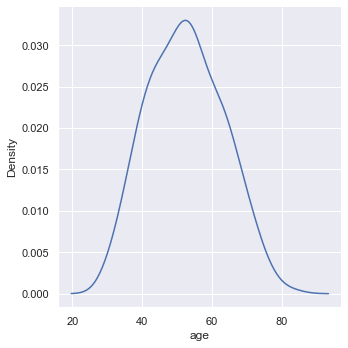

In [99]:
# pdf -- Probability Density Function

sns.displot(df, x="age", kind="kde")

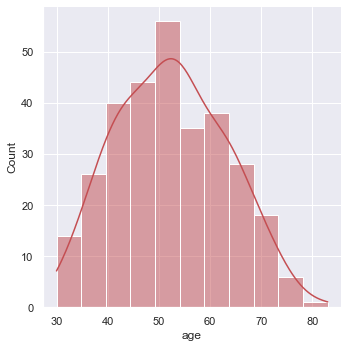

In [109]:
# Combining histplot and kdeplot

sns.displot(df, x="age", kind="hist",kde = True,color='r')

Hist_prob:  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
Bins : [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


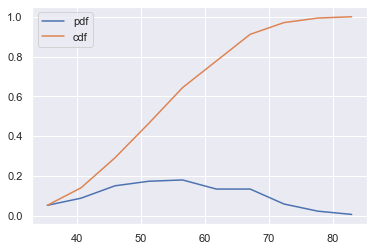

In [118]:
# pdf and cdf
# cdf -- Cummulative Distribution function Function
# cdf can be plotted to discrete and continuous random varibales
hists,bins = np.histogram(df['age'])
hists_prob = hists/sum(hists)
cdf = np.cumsum(hists_prob)
plt.plot(bins[1:],hists_prob,label='pdf')
plt.plot(bins[1:],cdf,label='cdf')
plt.legend()
print("Hist_prob: ",hists_prob)
print("Bins :",bins)

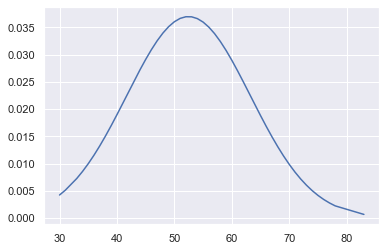

In [96]:
# Guassian districution with the mean and std of df['age']

mean = np.mean(df['age'])
std = np.std(df['age'])
from scipy.stats import norm
plt.plot(df['age'], norm.pdf(df['age'], mean, std))

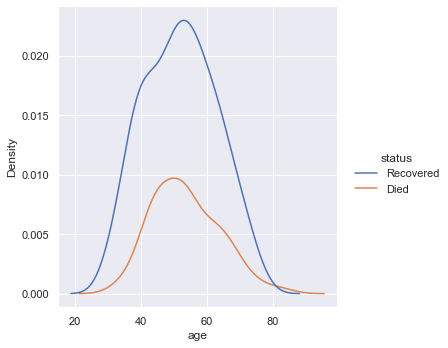

In [111]:
sns.displot(df, x="age", kind="kde",hue = 'status')

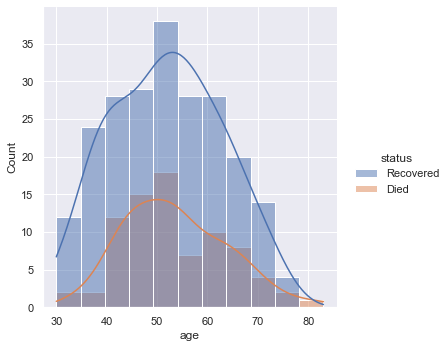

In [112]:
sns.displot(df, x="age", kind="hist",hue = 'status',kde=True)

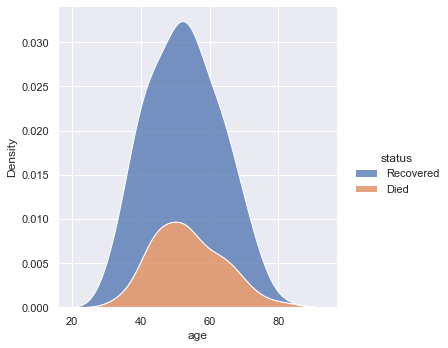

In [113]:
sns.displot(df, x="age", kind="kde",hue = 'status',multiple = 'stack')

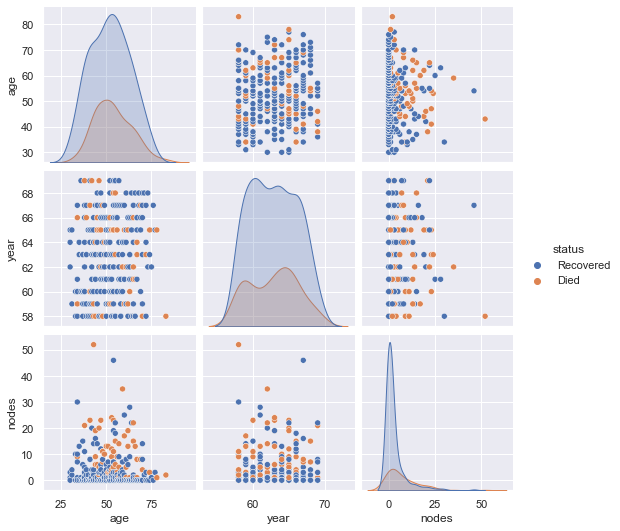

In [134]:
sns.pairplot(df,hue = 'status')

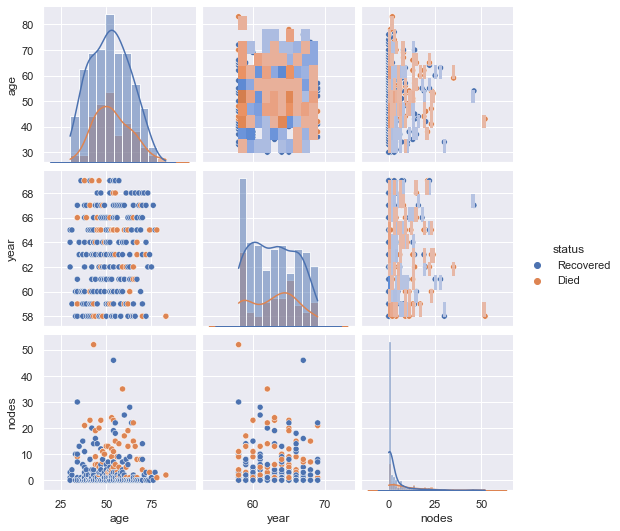

In [135]:
g = sns.pairplot(df,hue='status')
g.map_upper(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)

<font size = '6'>Relplot</font><br><br>
<font size = '4'>Plotting statistical relationships</font>

In [ ]:
# relplot() versions
# scatterplot() (with kind="scatter"; the default)

# lineplot() (with kind="line")

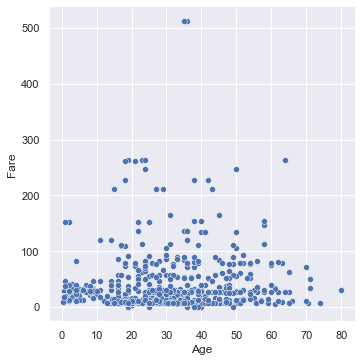

In [124]:
sns.relplot(x="Age", y="Fare", data=df_tit)

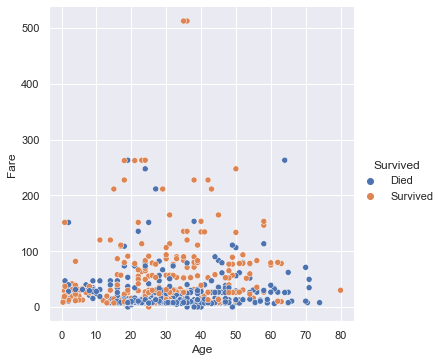

In [125]:
sns.relplot(x="Age", y="Fare", data=df_tit,hue='Survived')

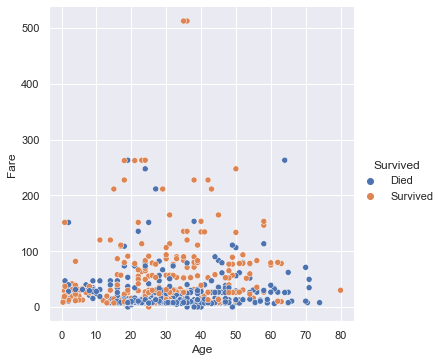

In [129]:
sns.relplot(x="Age", y="Fare", data=df_tit,hue='Survived')

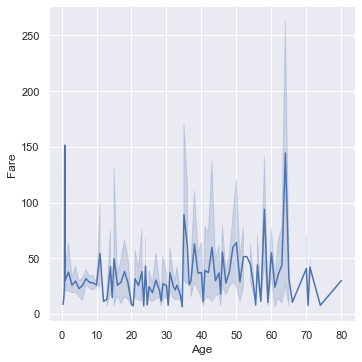

In [130]:
sns.relplot(x="Age", y="Fare", data=df_tit,kind = 'line')

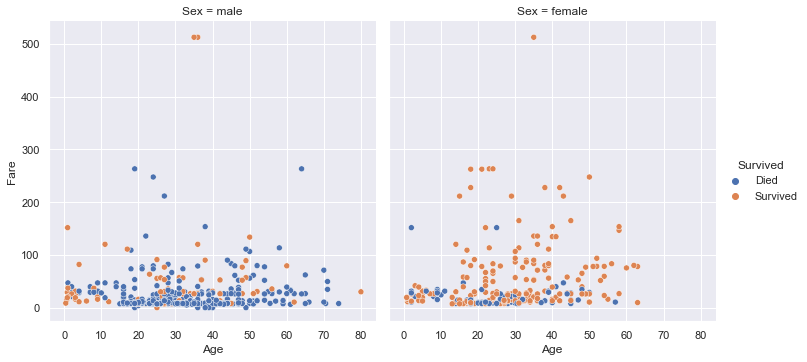

In [131]:
sns.relplot(x="Age", y="Fare", col='Sex',data=df_tit,hue='Survived')

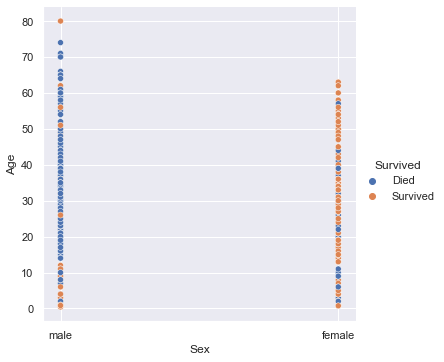

In [133]:
sns.relplot(x="Sex", y="Age", data=df_tit,hue='Survived')

<font size = '6'>Plotting with Categorical data</font>

# Versions of catplot()

<b>Categorical scatterplots:</b>

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

<b>Categorical distribution plots:</b>

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

<b>Categorical estimate plots:</b>

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

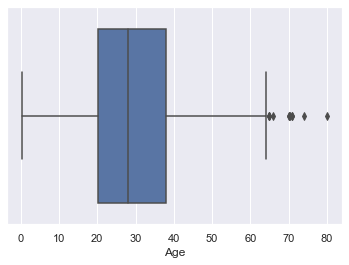

In [143]:
sns.boxplot(x = df_tit['Age'])

# or 
# sns.boxplot(x = 'Age',data = df_tit)

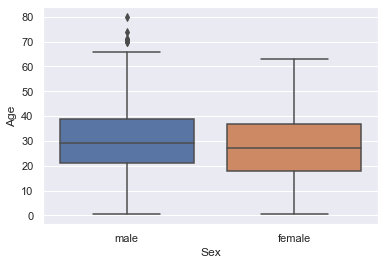

In [148]:
# make sure one of the column is categorical
sns.boxplot(x = 'Sex',y ='Age', data = df_tit)

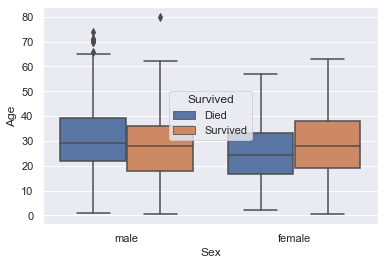

In [149]:
sns.boxplot(x = 'Sex',y ='Age', data = df_tit,hue = 'Survived')

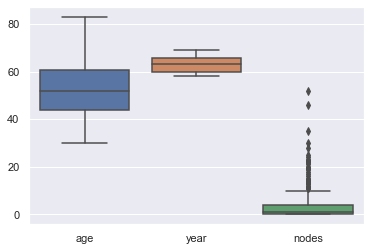

In [152]:
# Box plot for all the numeric variables in data
sns.boxplot(data = df)

c:\users\manikanta\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


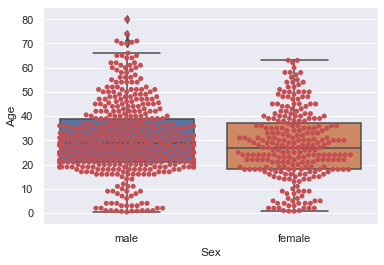

In [188]:
# Data points distribution on boxplot
ax = sns.boxplot(x = 'Sex',y ='Age', data = df_tit)
ax = sns.swarmplot(data = df_tit,x = 'Sex',y = 'Age',color='r')

<font size = '6'>BarPlot</font>

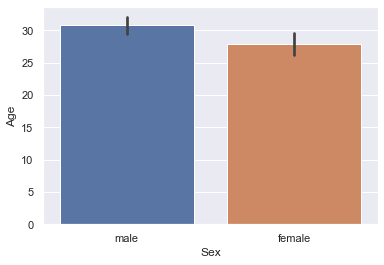

In [168]:
# Default estimator is Mean
sns.barplot(data = df_tit, x = 'Sex', y ='Age')

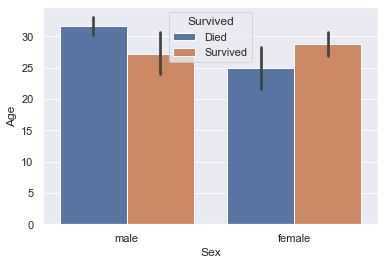

In [170]:
sns.barplot(data = df_tit, x = 'Sex', y ='Age',hue = 'Survived')

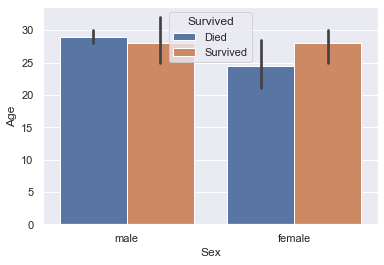

In [172]:
from numpy import median
sns.barplot(data = df_tit, x = 'Sex', y ='Age',hue = 'Survived',estimator = median)

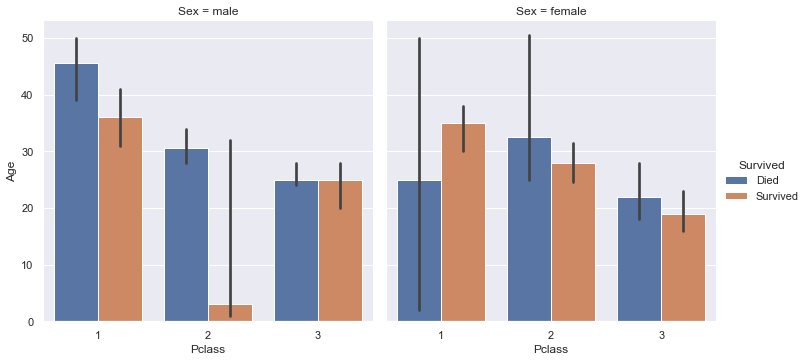

In [174]:
sns.catplot(data = df_tit, x = 'Pclass', y ='Age', col = 'Sex', hue = 'Survived',estimator = median,kind = 'bar')

<font size = '6'>Count plot</font><br><br>
<font size = '4'>Shows the counts of observations in each categorical bin using bars.</font>

male      577
female    314
Name: Sex, dtype: int64

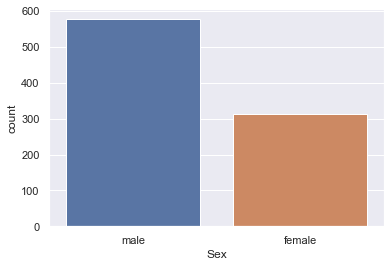

In [177]:
sns.countplot(x = 'Sex', data = df_tit)
df_tit['Sex'].value_counts()

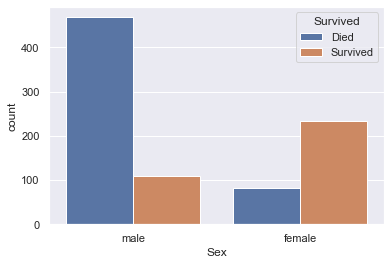

In [178]:
sns.countplot(x = 'Sex', data = df_tit,hue = 'Survived')

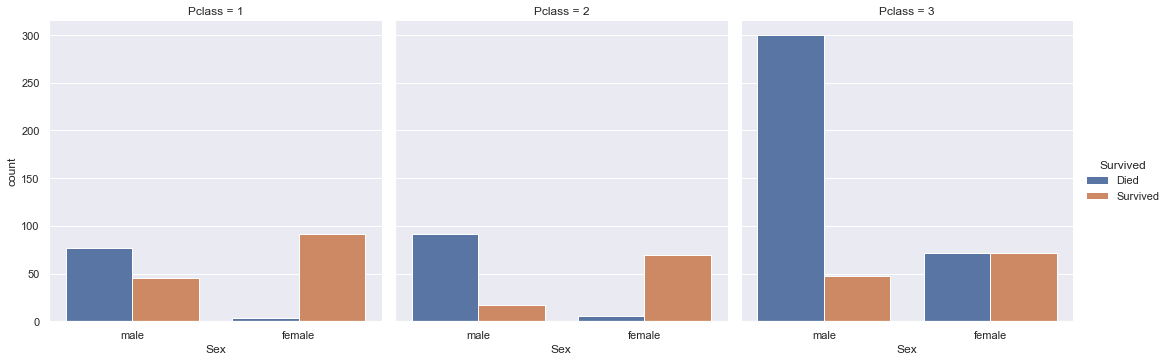

In [180]:
sns.catplot(x = 'Sex', col = 'Pclass', data = df_tit,hue = 'Survived',kind = 'count')